In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')
unemployment_rate = pd.read_csv('data/SEAT653URN.csv')

In [3]:
crime_df.columns = crime_df.columns.str.lower().str.strip().str.replace(' ','_')
crime_df['offense_start_datetime'] = pd.to_datetime(crime_df['offense_start_datetime'])
crime_df['report_datetime'] = pd.to_datetime(crime_df['report_datetime'])
crime_df.dropna(subset=['mcpp', 'offense_start_datetime'], inplace=True)
crime_df.drop_duplicates(inplace=True)  
crime_df['offense'] = crime_df['offense'].str.lower()
crime_df['year'] = crime_df['offense_start_datetime'].dt.year
crime_df['month'] = crime_df['offense_start_datetime'].dt.month

In [4]:
crime_df.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,drug/narcotic violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,theft of motor vehicle parts or accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,destruction/damage/vandalism of property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2


In [5]:
crime_df['offense'].value_counts()

offense
theft from motor vehicle                       177669
burglary/breaking & entering                   127886
destruction/damage/vandalism of property       105376
all other larceny                               94908
simple assault                                  85436
motor vehicle theft                             77620
shoplifting                                     68550
theft of motor vehicle parts or accessories     39853
aggravated assault                              39205
intimidation                                    38507
trespass of real property                       34369
theft from building                             31217
robbery                                         26322
drug/narcotic violations                        24705
credit card/automated teller machine fraud      20360
driving under the influence                     19921
identity theft                                  13368
impersonation                                   12877
false pretenses/swin

In [6]:

# Step 1: Filter the DataFrame for the specified offenses
offense_types = [
    'drug/narcotic violations', 
    'prostitution', 
    'drug equipment violations', 
    'driving under the influence', 
    'family offenses, nonviolent', 
    'curfew/loitering/vagrancy violations'
]

offense_crime_df = crime_df[crime_df['offense'].isin(offense_types)]

# Step 2: Create new columns for each offense type
for offense in offense_types:
    crime_df[offense] = (crime_df['offense'] == offense).astype(int)

# Step 3: Group by year and sum occurrences for each offense
annual_offense_counts = crime_df.groupby('year')[offense_types].sum().reset_index()

# Display the result
annual_offense_counts.head()


,year,drug/narcotic violations,prostitution,drug equipment violations,driving under the influence,"family offenses, nonviolent",curfew/loitering/vagrancy violations
0,1908,0,0,0,1,0,0
1,1915,0,0,0,0,0,0
2,1920,0,0,0,0,0,0
3,1929,0,0,0,0,0,0
4,1934,0,0,0,0,0,0


In [7]:
unemployment_rate.head()

,DATE,SEAT653URN
0,1990-01-01,4.8
1,1990-02-01,4.6
2,1990-03-01,4.4
3,1990-04-01,3.7
4,1990-05-01,3.9


In [8]:
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])
unemployment_rate['year'] = unemployment_rate.DATE.dt.year
unemployment_rate.rename(columns={'SEAT653URN' : 'unemployment_rate'}, inplace = True)
unemployment_yearly = unemployment_rate.groupby(['year'])['unemployment_rate'].mean().reset_index()

In [9]:
unemployment_yearly.to_csv('unemployment_yearly.csv')
unemployment_yearly.head()

,year,unemployment_rate
0,1990,3.966667
1,1991,4.791667
2,1992,5.858333
3,1993,6.016667
4,1994,5.100000


In [10]:
offense_unemployement_merged = annual_offense_counts.merge(unemployment_yearly, on= 'year')

In [11]:
offense_unemployement_merged

,year,drug/narcotic violations,prostitution,drug equipment violations,driving under the influence,"family offenses, nonviolent",curfew/loitering/vagrancy violations,unemployment_rate
0,1990,0,0,0,0,1,0,3.966667
1,1991,0,0,0,0,2,0,4.791667
2,1992,0,0,0,0,2,0,5.858333
3,1993,0,0,0,0,0,0,6.016667
4,1994,0,0,0,0,1,0,5.100000
5,1995,0,0,0,0,1,0,5.025000
6,1996,0,1,0,0,0,0,4.625000
7,1997,0,0,0,0,2,0,3.933333
8,1998,0,0,0,0,5,0,3.683333
9,1999,0,0,0,0,2,0,3.708333


In [12]:
offense_unemployement = offense_unemployement_merged.iloc[0:18].index

offense_unemployement_merged.drop(offense_unemployement, inplace = True)

In [13]:
offense_unemployement_merged

,year,drug/narcotic violations,prostitution,drug equipment violations,driving under the influence,"family offenses, nonviolent",curfew/loitering/vagrancy violations,unemployment_rate
18,2008,2874,274,479,1066,781,102,4.350000
19,2009,2190,304,498,1238,911,121,7.691667
20,2010,2317,536,551,1302,933,125,8.950000
21,2011,1688,408,374,1508,897,77,8.158333
22,2012,1569,239,442,1272,761,55,6.950000
23,2013,1344,195,362,1110,828,57,5.300000
24,2014,1037,280,193,1014,907,42,5.050000
25,2015,1432,317,180,1025,963,47,4.641667
26,2016,1636,420,213,1166,903,62,4.316667
27,2017,2128,363,196,1381,913,60,3.983333


In [14]:
offense_unemployement_merged.to_csv('offense_unemployment.csv')

In [15]:
# Extract the relevant columns
unemployment_rate = offense_unemployement_merged['unemployment_rate']
prostitution = offense_unemployement_merged['prostitution']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(unemployment_rate, prostitution)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'")
else:
    print("Fail to reject the null hypothesis: No significant difference between 'unemployment rate' and 'prostitution'")

#0.00002144010523816316


T-Statistic: -4.973857787015656
P-Value: 2.144010523816316e-05
Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'


In [16]:
# Extract the relevant columns
unemployment_rate = offense_unemployement_merged['unemployment_rate']
drug_equipment_violations = offense_unemployement_merged['drug equipment violations']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(unemployment_rate, drug_equipment_violations)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'")
else:
    print("Fail to reject the null hypothesis: No significant difference between 'unemployment rate' and 'prostitution'")

#0.000015830209762781525


T-Statistic: -5.078200640960925
P-Value: 1.5830209762781525e-05
Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'


In [17]:
# Extract the relevant columns
unemployment_rate = offense_unemployement_merged['unemployment_rate']
curfew_loitering_vagrancy_violations = offense_unemployement_merged['curfew/loitering/vagrancy violations']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(unemployment_rate, curfew_loitering_vagrancy_violations)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'")
else:
    print("Fail to reject the null hypothesis: No significant difference between 'unemployment rate' and 'prostitution'")

#0.000011383153180532731

T-Statistic: -5.191531779323422
P-Value: 1.1383153180532731e-05
Reject the null hypothesis: Significant difference between 'unemployment rate' and 'prostitution'


In [18]:
# evtl run the code above again
offense_unemployement_without_year = offense_unemployement_merged[['unemployment_rate', 'drug/narcotic violations', 'prostitution', 'drug equipment violations', 'driving under the influence', 'family offenses, nonviolent', 'curfew/loitering/vagrancy violations']]

In [19]:
offense_unemployement_without_year

,unemployment_rate,drug/narcotic violations,prostitution,drug equipment violations,driving under the influence,"family offenses, nonviolent",curfew/loitering/vagrancy violations
18,4.350000,2874,274,479,1066,781,102
19,7.691667,2190,304,498,1238,911,121
20,8.950000,2317,536,551,1302,933,125
21,8.158333,1688,408,374,1508,897,77
22,6.950000,1569,239,442,1272,761,55
23,5.300000,1344,195,362,1110,828,57
24,5.050000,1037,280,193,1014,907,42
25,4.641667,1432,317,180,1025,963,47
26,4.316667,1636,420,213,1166,903,62
27,3.983333,2128,363,196,1381,913,60


In [20]:
correlation_matrix = offense_unemployement_without_year.corr()

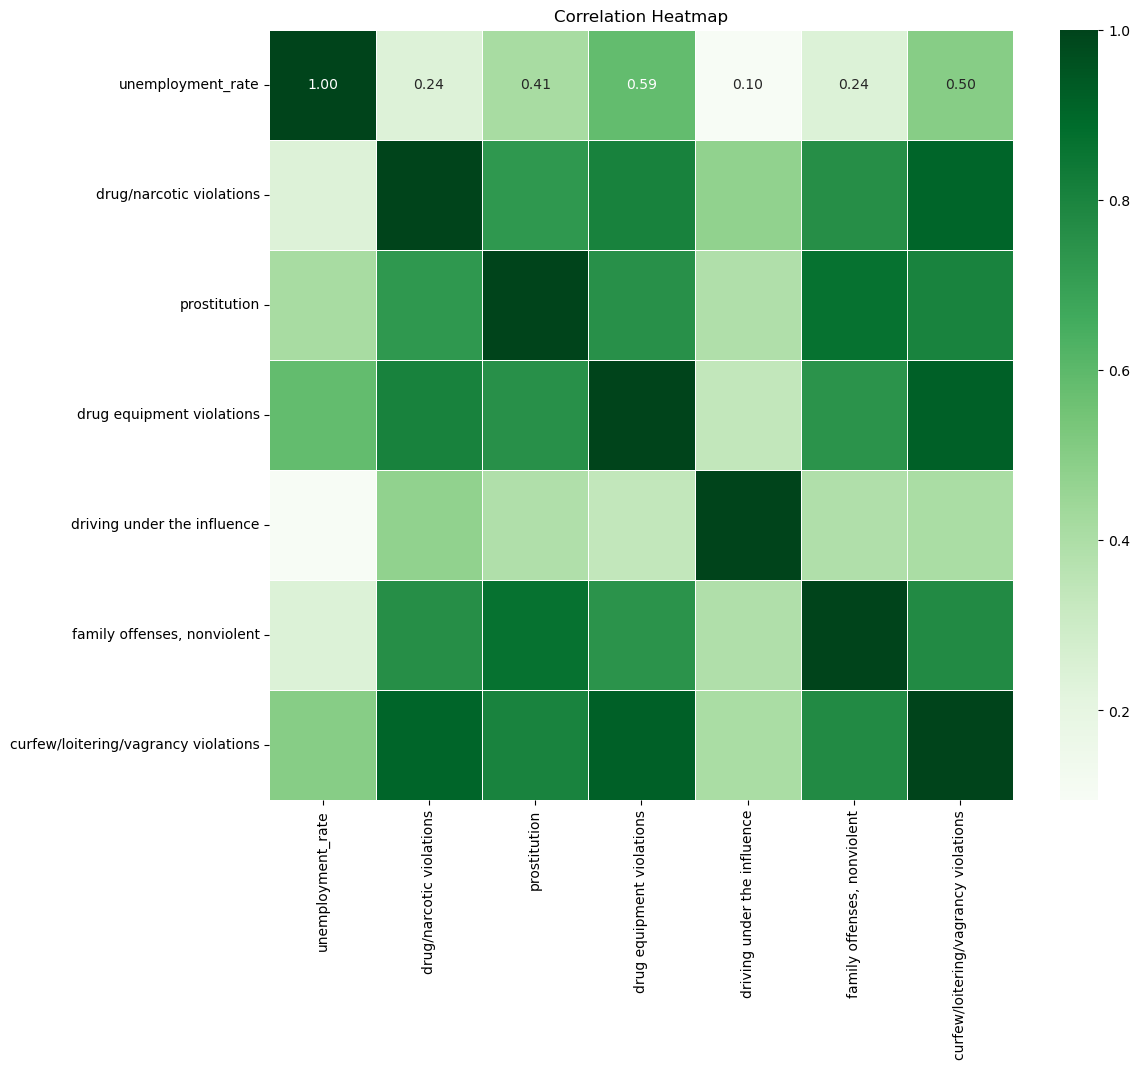

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

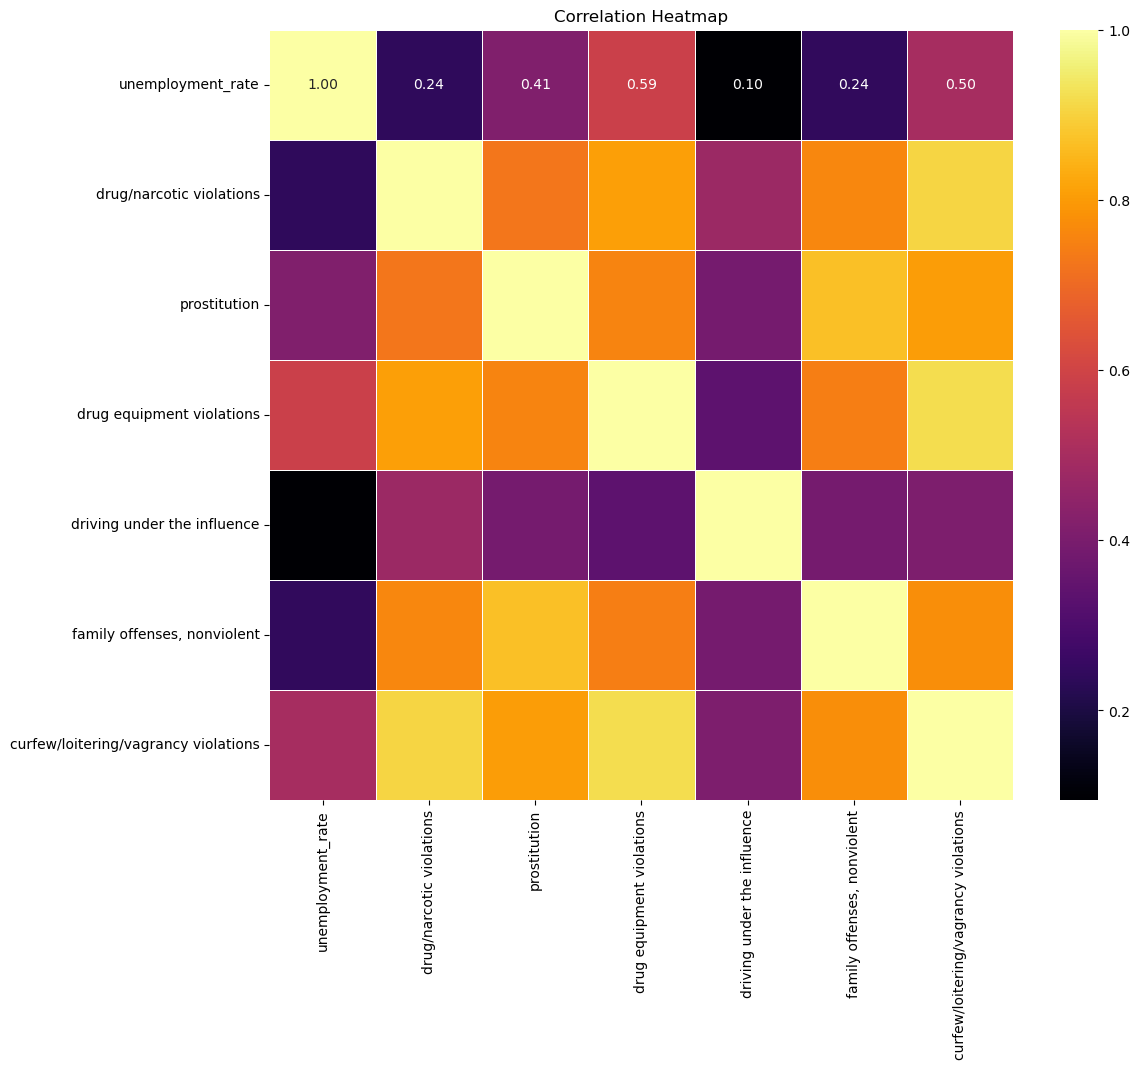

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

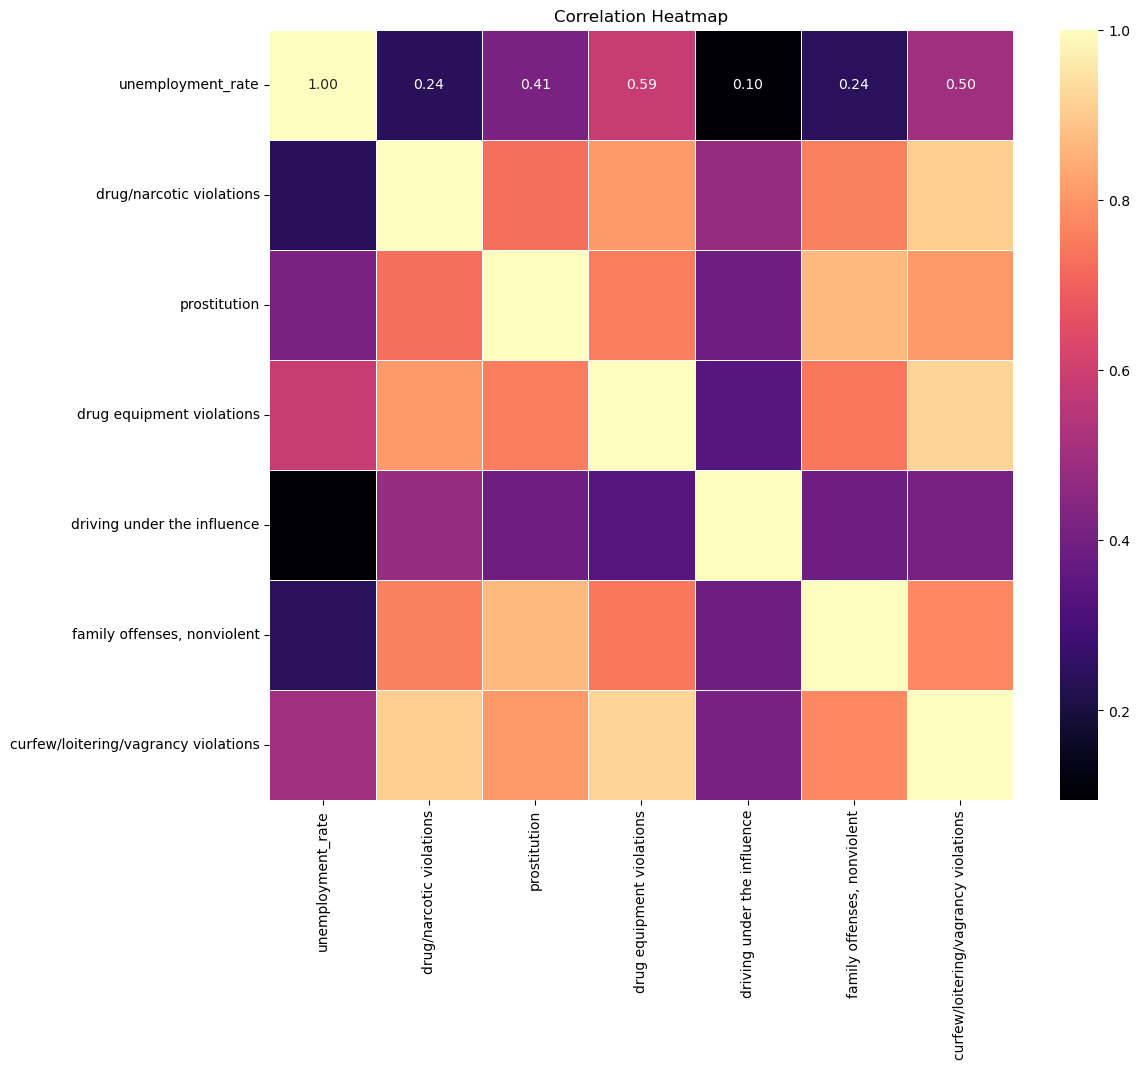

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

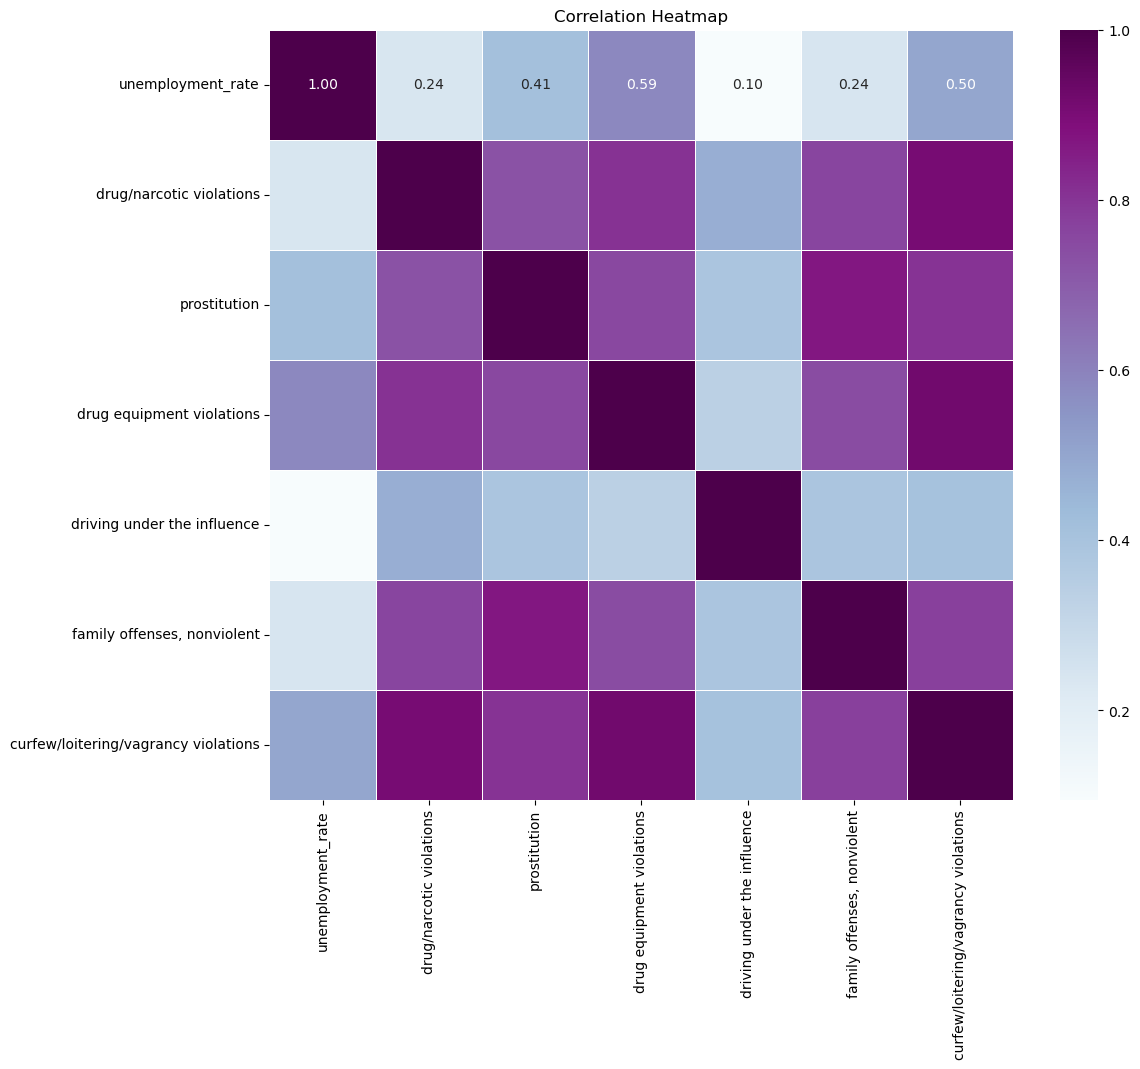

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

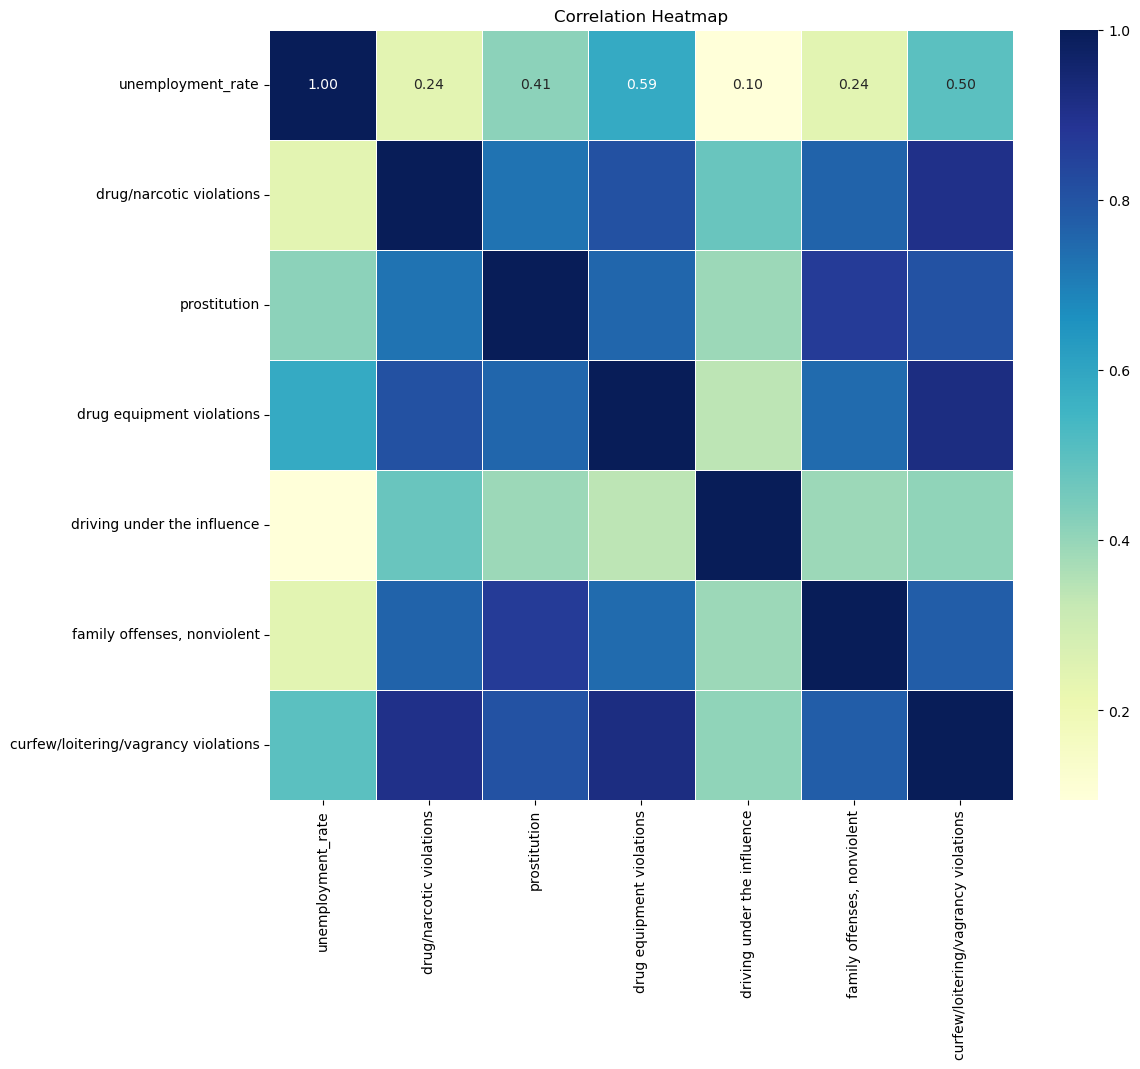

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

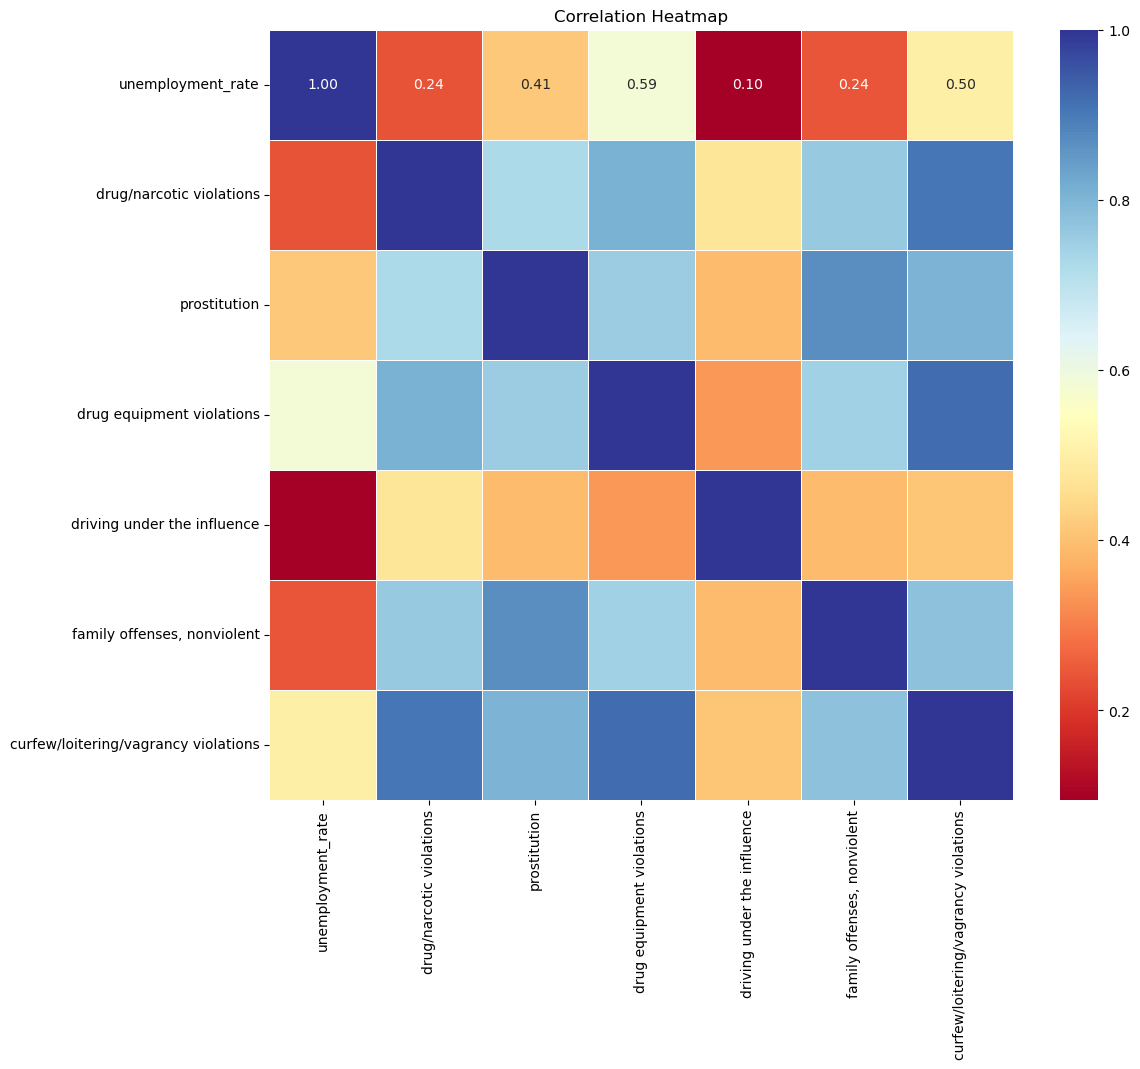

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

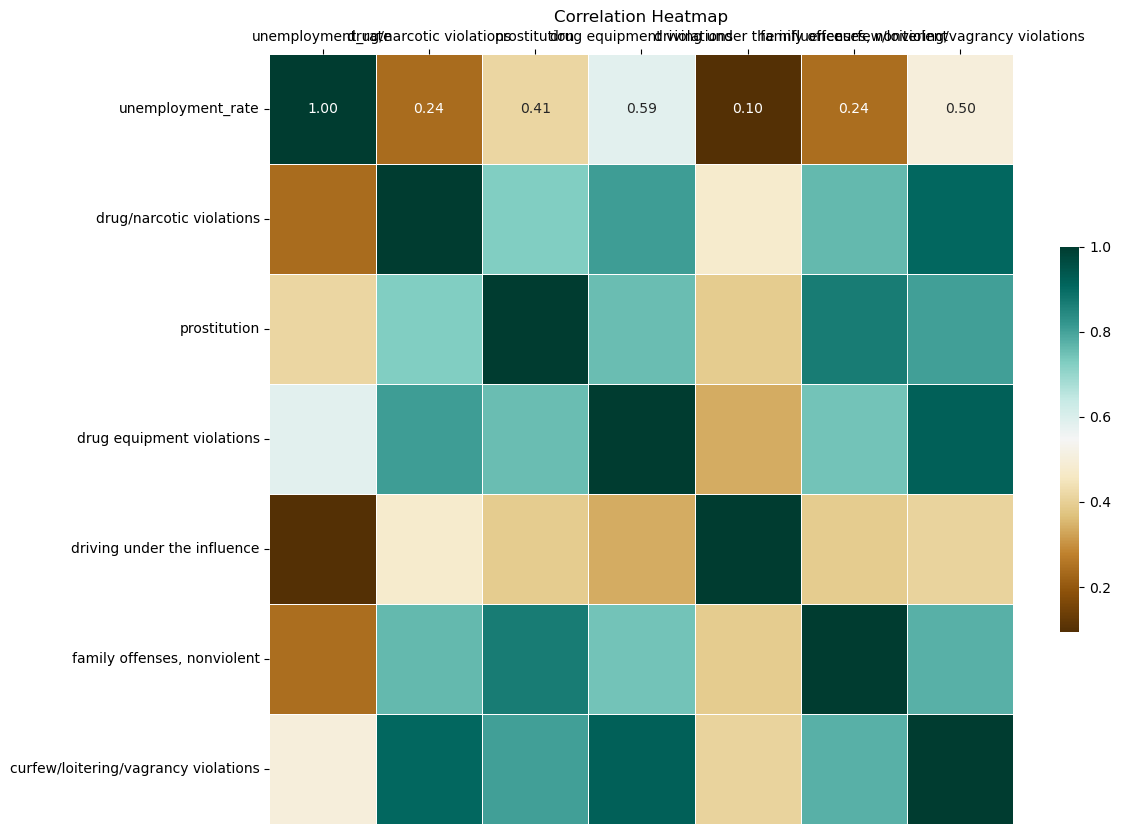

In [39]:
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x labels to be on the top
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.gca().xaxis.tick_top()  # Move x-axis labels to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top

# Display the plot
plt.show()

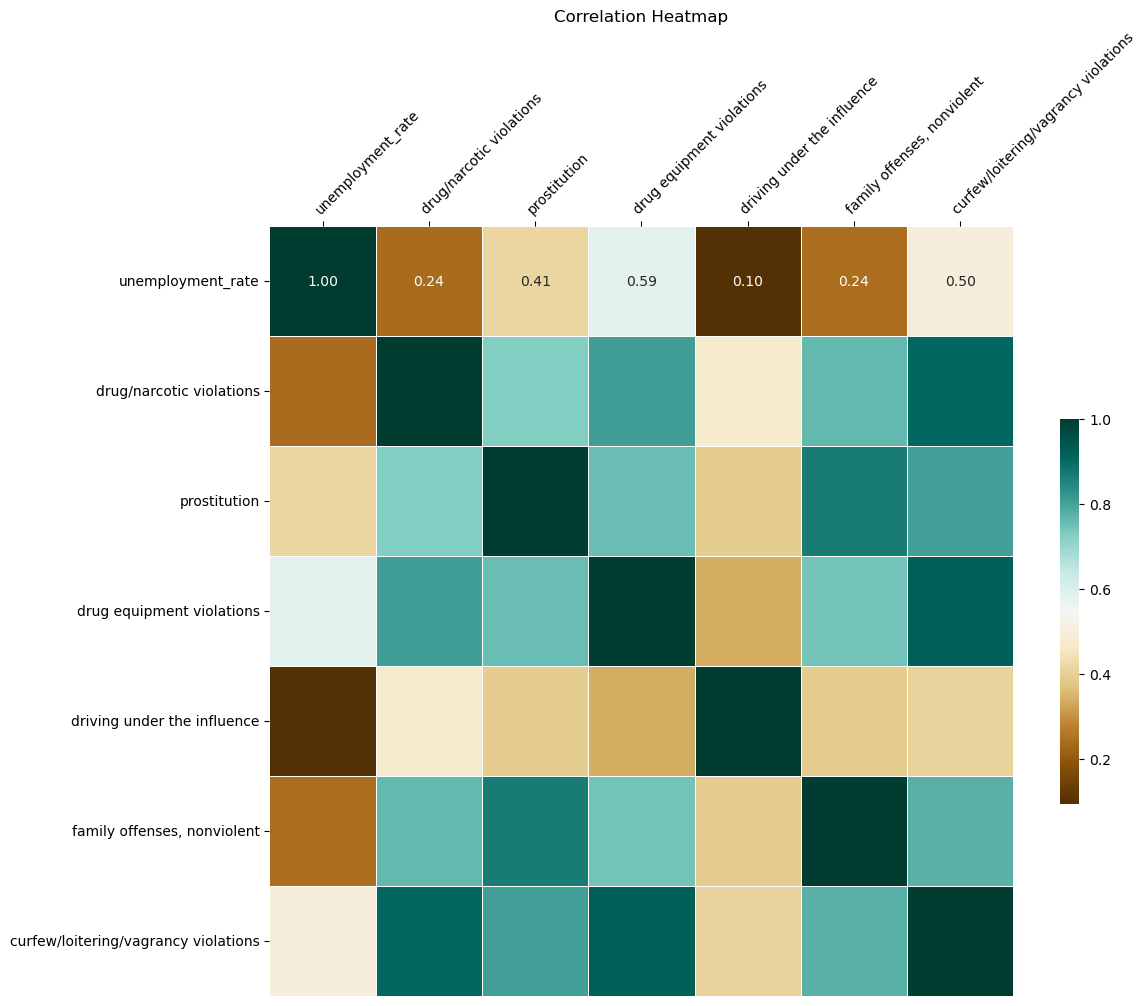

In [40]:
# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x labels to be on the top and angled
plt.xticks(rotation=45, ha='left')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.gca().xaxis.tick_top()  # Move x-axis labels to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top

# Adjust alignment of the x labels to prevent overlapping
plt.xticks(rotation=45, ha='left', rotation_mode='anchor')

# Display the plot
plt.show()